**Import Libraries**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Training Data.csv to Training Data.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv ('Training Data.csv')

# Stage 1

## **1. Descriptive Statistics**


In [ ]:
# Columns, Null Values, Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Pengamatan:
- Data terdiri dari 252000 baris dengan total 13 kolom
- Tidak terdapat null/missing values pada setiap kolom
- Tipe data pada setiap kolom sudah sesuai


In [ ]:
# cuplikan data
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Pengamatan :
 - Tidak ada anomali pada setiap entri kolom (nilai yang di entri sudah sesuai dengan nama kolom)

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
numericals = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
categoricals = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

In [ ]:
# ringkasan statistik dari kolom numericals
df[numericals].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Pengamatan:
- Kolom `Income`, `Age`, `Experience`, `CURRENT_JOB_YRS`, dan `CURRENT_HOUSE_YRS` tampak sudah cukup simetrik distribusinya (mean dan median tidak berbeda jauh)
- Nilai maksimum dan minimum berada dibatas wajar
- Kolom `Risk_flag` bernilai boolean

In [ ]:
# ringkasan statistik dari kolom categoricals
df[categoricals].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


Beberapa pengamatan:
1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh customer yang belum menikah (`Married/Single`), menyewa rumah (`House_Ownership`), dan tidak memiliki mobil (`Car_Ownership`)
2. Kolom `Profession`, `CITY`, dan `STATE` memiliki jumlah unique values yang tinggi. 
3. Statistical summary pada categorical disimpulkan bahwa terdapat :
  - Married/Single : 2 (unique value)
  - House_Ownership : 3 (unique value)
  - Car_Ownership : 2 (unique value)
  - Profession :51 (unique value)
  - CITY : 317 (unique value)
  - STATE: 29 (unique value)

In [ ]:
# value counting pada kolom-kolom categorical
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Married/Single:
single     226272
married     25728
Name: Married/Single, dtype: int64

Value count kolom House_Ownership:
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value count kolom Car_Ownership:
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value count kolom Profession:
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              51

## **2. Univariate Analysis**

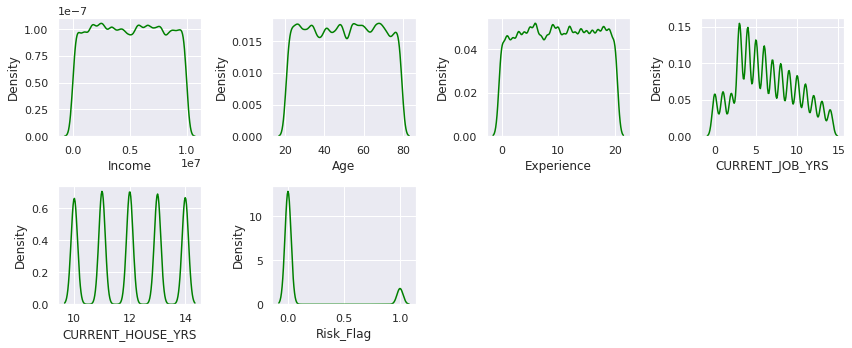

In [ ]:
#univariate analysis

feature = numericals

for i in range(0,len(feature)):
  sns.set(rc={'figure.figsize':(12,5)})
  plt.subplot(2,4,i+1)
  sns.kdeplot(x=df[feature[i]], color='green')
  plt.xlabel(feature[i])
  plt.tight_layout()

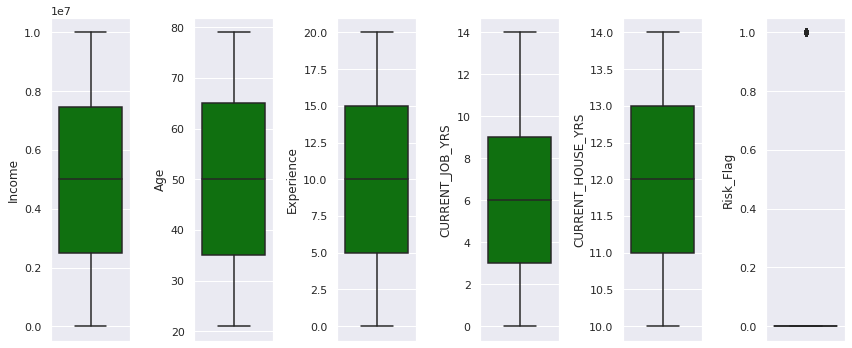

In [ ]:
feature = numericals

for i in range(0,len(feature)):
  sns.set(rc={'figure.figsize':(12,5)})
  plt.subplot(1,len(feature),i+1)
  sns.boxplot(y=df[feature[i]],color='green',orient='v')
  plt.tight_layout()

In [ ]:
df.shape

(252000, 13)

In [ ]:
N = 252000
e = 0.05
slovin = N/(1+N * e**2)
slovin

399.3660855784468

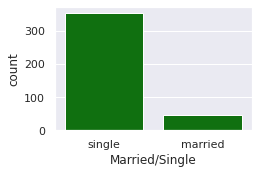

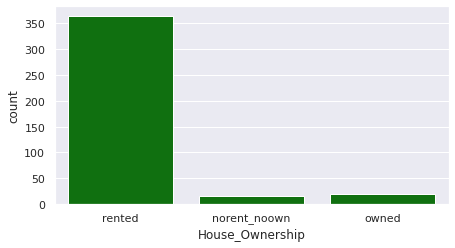

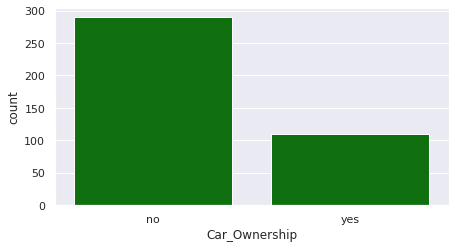

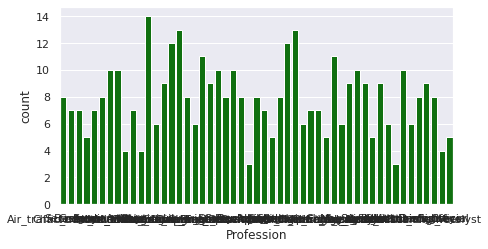

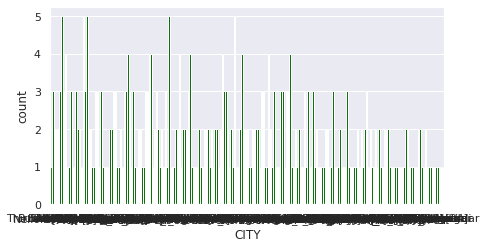

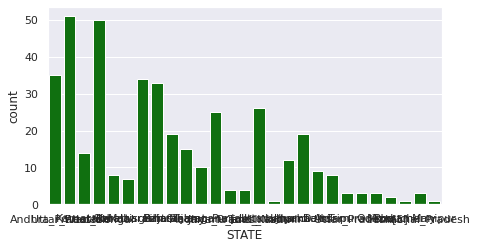

<Figure size 1728x576 with 0 Axes>

In [ ]:
features = categoricals
df_sample = df.sample(400, random_state=213)
for i in range(0, len(categoricals)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[categoricals[i]], color='green', orient='v')
    plt.figure(figsize=(24,8))

Dengan menggunakan sample 400, dapat disimpulkan bahwa terdapat feature / column yang timpang, diantaranya adalah single/married dan House Ownership.

## **3. Multivariate Analysis**

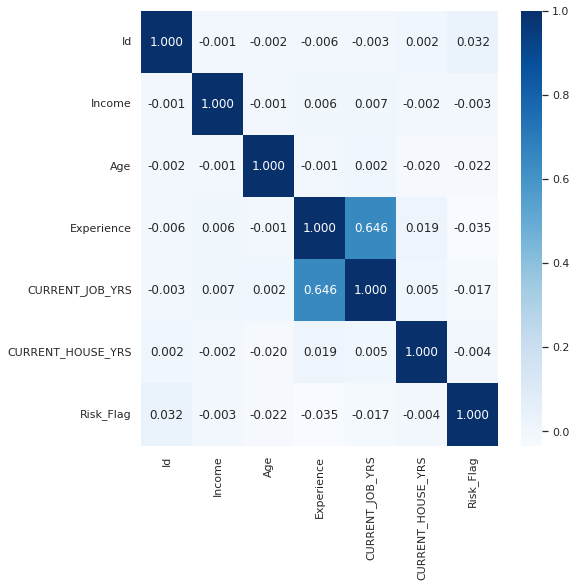

In [ ]:
#multivariate analysis (mencari hubungan antar kolom )
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.3f')

In [ ]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


Dari korelasi map diatas, yag berkorelasi dengan risk flag adalah column `Age` (-0.021809), `Experience`(-0.034523), dan `CURRENT_JOB_YRS`(-0.016942). 

Sedangkan yang lainnya berkorelasi namun sangat kecil dengan `Risk_Flag` yaitu column `Income`(-0.003091) dan `CURRENT_HOUSE_YRS`(-0.004375).

## **4. Business Insight**


### a. Insights & Visualizations

#### Risk Flag

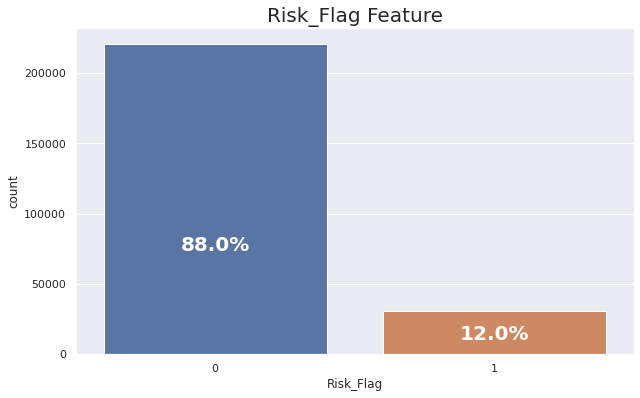

In [ ]:
# Target features first
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Risk_Flag')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/3, s=f"{np.round(i.get_height()/len(df)*100,0)}%", 
            ha='center', size=20, weight='bold', rotation=360, color='white')
plt.title("Risk_Flag Feature", size=20)
plt.show()

Data target, yaitu `Risk_Flag` terdiri dari **88% yang bernilai 0 (customer membayar pinjaman)**, dan **12% yang bernilai 1 (customer gagal membayar pinjaman)**.

#### State

In [63]:
count_state = df.groupby('STATE').agg({'Id' : 'nunique'}).reset_index().sort_values(by='Id', ascending = False)
#data_sorted = train_df.sort_values(by='STATE', ascending = False)
#data_sorted
print('5 state dengan customer terbanyak:\n',count_state.head(5))
print('\n5 state dengan customer tersedikit:\n',count_state.tail(5))

5 state dengan customer terbanyak:
              STATE     Id
25   Uttar_Pradesh  28400
14     Maharashtra  25562
0   Andhra_Pradesh  25297
28     West_Bengal  23483
2            Bihar  19780

5 state dengan customer tersedikit:
                STATE   Id
8   Himachal_Pradesh  833
24           Tripura  809
26  Uttar_Pradesh[5]  743
3         Chandigarh  656
21            Sikkim  608


##### Top 5 States



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


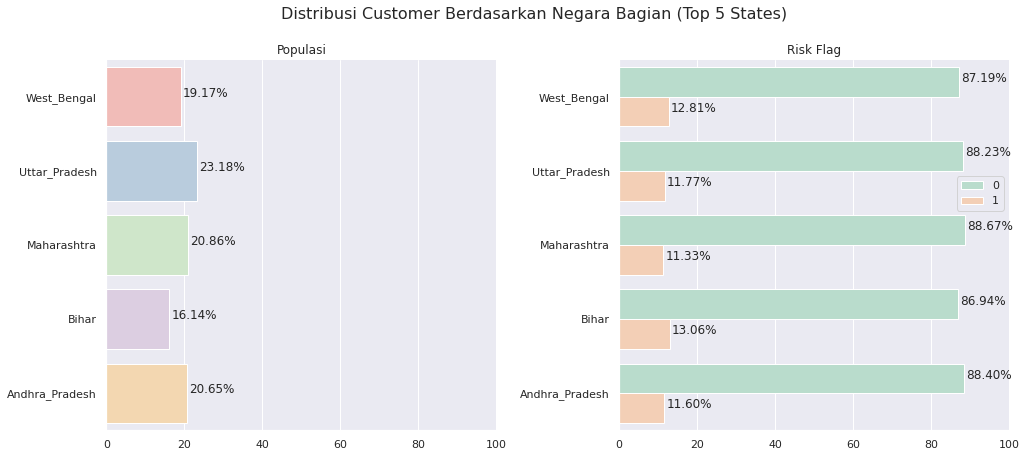

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Negara Bagian (Top 5 States)\n', fontsize=16, verticalalignment='bottom')

# Plot 1 (State)
dfg_0a = df.groupby(['STATE']).agg({'Id' : 'nunique'}).reset_index()
df_0a = dfg_0a[(dfg_0a['STATE'] == 'Uttar_Pradesh' )| (dfg_0a['STATE'] == 'Maharashtra' )| (dfg_0a['STATE'] == 'Andhra_Pradesh') |(dfg_0a['STATE'] == 'West_Bengal')|(dfg_0a['STATE'] == 'Bihar')]
df_0a.loc[:,'percentage'] = 100.00*df_0a['Id']/df_0a['Id'].sum()
df_0a = df_0a.sort_values(['STATE'],ascending=False)
ax1 = sns.barplot(x='percentage', y='STATE',ax=ax1, data=df_0a.reset_index(), palette='Pastel1')
y = df_0a.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
dfg_0b = df.groupby(['STATE','Risk_Flag']).agg({'Id' : 'nunique'}).reset_index()
df_0b = dfg_0b[(dfg_0b['STATE'] == 'Uttar_Pradesh' )| (dfg_0b['STATE'] == 'Maharashtra' )| (dfg_0b['STATE'] == 'Andhra_Pradesh') |(dfg_0b['STATE'] == 'West_Bengal')|(dfg_0b['STATE'] == 'Bihar')]

def ratio_state(x): # Menghitung ratio
    if x['STATE'] == 'Uttar_Pradesh':
        ratio_state = round(x['Id']*100/df_0b[df_0b['STATE']=='Uttar_Pradesh']['Id'].sum(), 2)
    elif x['STATE'] == 'Maharashtra':
        ratio_state = round(x['Id']*100/df_0b[df_0b['STATE']=='Maharashtra']['Id'].sum(), 2)
    elif x['STATE'] == 'Andhra_Pradesh':
        ratio_state = round(x['Id']*100/df_0b[df_0b['STATE']=='Andhra_Pradesh']['Id'].sum(), 2)
    elif x['STATE'] == 'West_Bengal':
        ratio_state = round(x['Id']*100/df_0b[df_0b['STATE']=='West_Bengal']['Id'].sum(), 2)
    else:
        ratio_state = round(x['Id']*100/df_0b[df_0b['STATE']=='Bihar']['Id'].sum(), 2)
    return ratio_state
df_0b['percentage'] = df_0b.apply(lambda x: ratio_state(x), axis=1)
df_0b = df_0b.sort_values(['STATE'],ascending=False)

ax2 = sns.barplot(x='percentage', y='STATE', hue='Risk_Flag', ax=ax2, data=df_0b.reset_index(), palette='Pastel2')
ax2.text(87.19+0.5, -.2, '{:,.2f}%'.format(87.19))
ax2.text(12.81+0.5, .2, '{:,.2f}%'.format(12.81))
ax2.text(88.23+0.5, .8, '{:,.2f}%'.format(88.23))
ax2.text(11.77+0.5, 1.2, '{:,.2f}%'.format(11.77))
ax2.text(88.67+0.5, 1.8, '{:,.2f}%'.format(88.67))
ax2.text(11.33+0.5, 2.2, '{:,.2f}%'.format(11.33))
ax2.text(86.94+0.5, 2.8, '{:,.2f}%'.format(86.94))
ax2.text(13.06+0.5, 3.2, '{:,.2f}%'.format(13.06))
ax2.text(88.40+0.5, 3.8, '{:,.2f}%'.format(88.40))
ax2.text(11.60+0.5, 4.2, '{:,.2f}%'.format(11.60))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.7))

plt.tight_layout()

In [79]:
df_0b

,STATE,Risk_Flag,Id,percentage
56,West_Bengal,0,20474,87.19
57,West_Bengal,1,3009,12.81
50,Uttar_Pradesh,0,25057,88.23
51,Uttar_Pradesh,1,3343,11.77
28,Maharashtra,0,22667,88.67
29,Maharashtra,1,2895,11.33
4,Bihar,0,17197,86.94
5,Bihar,1,2583,13.06
0,Andhra_Pradesh,0,22362,88.40
1,Andhra_Pradesh,1,2935,11.60


##### Bottom 5 States

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


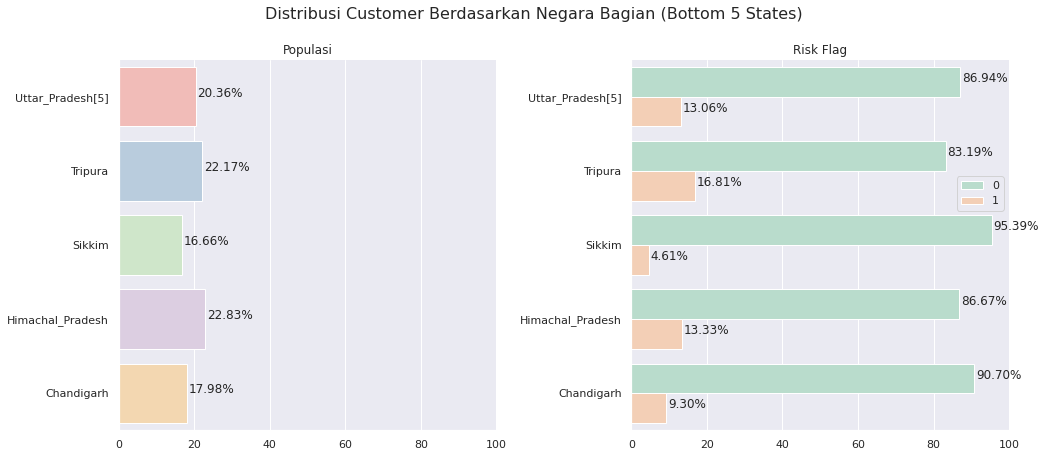

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Negara Bagian (Bottom 5 States)\n', fontsize=16, verticalalignment='bottom')

# Plot 1 (State)
dfg_0c = df.groupby(['STATE']).agg({'Id' : 'nunique'}).reset_index()
df_0c = dfg_0c[(dfg_0c['STATE'] == 'Uttar_Pradesh[5]' )| (dfg_0c['STATE'] == 'Himachal_Pradesh' )| (dfg_0c['STATE'] == 'Tripura') |(dfg_0c['STATE'] == 'Chandigarh')|(dfg_0c['STATE'] == 'Sikkim')]
df_0c.loc[:,'percentage'] = 100.00*df_0c['Id']/df_0c['Id'].sum()
df_0c = df_0c.sort_values(['STATE'],ascending=False)
ax1 = sns.barplot(x='percentage', y='STATE',ax=ax1, data=df_0c.reset_index(), palette='Pastel1')
y = df_0c.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
dfg_0d = df.groupby(['STATE','Risk_Flag']).agg({'Id' : 'nunique'}).reset_index()
df_0d = dfg_0d[(dfg_0d['STATE'] == 'Uttar_Pradesh[5]' )| (dfg_0d['STATE'] == 'Himachal_Pradesh' )| (dfg_0d['STATE'] == 'Tripura') |(dfg_0d['STATE'] == 'Chandigarh')|(dfg_0d['STATE'] == 'Sikkim')]

def ratio_state(x): # Menghitung ratio
    if x['STATE'] == 'Uttar_Pradesh[5]':
        ratio_state = round(x['Id']*100/df_0d[df_0d['STATE']=='Uttar_Pradesh[5]']['Id'].sum(), 2)
    elif x['STATE'] == 'Himachal_Pradesh':
        ratio_state = round(x['Id']*100/df_0d[df_0d['STATE']=='Himachal_Pradesh']['Id'].sum(), 2)
    elif x['STATE'] == 'Tripura':
        ratio_state = round(x['Id']*100/df_0d[df_0d['STATE']=='Tripura']['Id'].sum(), 2)
    elif x['STATE'] == 'Chandigarh':
        ratio_state = round(x['Id']*100/df_0d[df_0d['STATE']=='Chandigarh']['Id'].sum(), 2)
    else:
        ratio_state = round(x['Id']*100/df_0d[df_0d['STATE']=='Sikkim']['Id'].sum(), 2)
    return ratio_state
df_0d['percentage'] = df_0d.apply(lambda x: ratio_state(x), axis=1)
df_0d = df_0d.sort_values(['STATE'],ascending=False)

ax2 = sns.barplot(x='percentage', y='STATE', hue='Risk_Flag', ax=ax2, data=df_0d.reset_index(), palette='Pastel2')
ax2.text(86.94+0.5, -.2, '{:,.2f}%'.format(86.94))
ax2.text(13.06+0.5, .2, '{:,.2f}%'.format(13.06))
ax2.text(83.19+0.5, .8, '{:,.2f}%'.format(83.19))
ax2.text(16.81+0.5, 1.2, '{:,.2f}%'.format(16.81))
ax2.text(95.39+0.5, 1.8, '{:,.2f}%'.format(95.39))
ax2.text(4.61+0.5, 2.2, '{:,.2f}%'.format(4.61))
ax2.text(86.67+0.5, 2.8, '{:,.2f}%'.format(86.67))
ax2.text(13.33+0.5, 3.2, '{:,.2f}%'.format(13.33))
ax2.text(90.70+0.5, 3.8, '{:,.2f}%'.format(90.70))
ax2.text(9.30+0.5, 4.2, '{:,.2f}%'.format(9.30))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.7))

plt.tight_layout()

In [80]:
df_0d

,STATE,Risk_Flag,Id,percentage
52,Uttar_Pradesh[5],0,646,86.94
53,Uttar_Pradesh[5],1,97,13.06
48,Tripura,0,673,83.19
49,Tripura,1,136,16.81
42,Sikkim,0,580,95.39
43,Sikkim,1,28,4.61
16,Himachal_Pradesh,0,722,86.67
17,Himachal_Pradesh,1,111,13.33
6,Chandigarh,0,595,90.70
7,Chandigarh,1,61,9.30


Pengamatan:

*   Pada visualisasi-visualisasi di atas, dapat dilihat bahwa state yang mempunyai customer sedikit seperti Sikkim (608), dan Chandigarh (656) mempunyai resiko gagal bayar yang rendah, yaitu 4.61% untuk Sikkim, dan 9.30% untuk Chandigarh. 
*   Jika dilihat kebalikannya, pada state yang memiliki customer banyak seperti Uttar Pradesh dan West Bengal memiliki tingkat resiko gagal bayar yang tidak terlalu tinggi maupun rendah, namun perlu diingat bahwa customer yang ada di lokasi tersebut sangatlah banyak. Terdapat 3009 orang yang gagal bayar di West Bengal dan 3343 di Uttar Pradesh. 



#### Marital Status

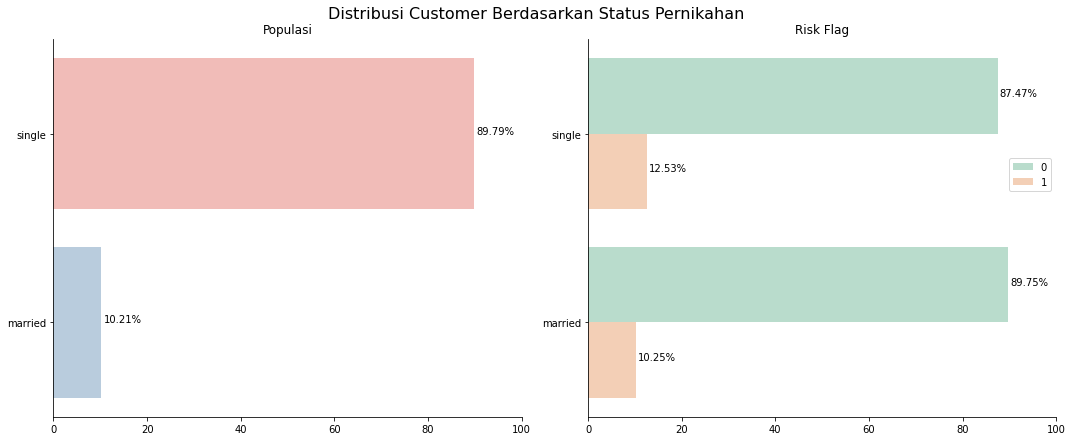

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Status Pernikahan', fontsize=16, verticalalignment='bottom')

# Plot 1 (Populasi)
df_1a = df.groupby(['Married/Single'])[['Id']].count().reset_index()
df_1a.loc[:,'percentage'] = 100.00*df_1a['Id']/df_1a['Id'].sum()
df_1a = df_1a.sort_values(['Married/Single'],ascending=False)
ax1 = sns.barplot(x='percentage', y='Married/Single',ax=ax1, data=df_1a.reset_index(), palette='Pastel1')
y = df_1a.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
df_1b = df.groupby(['Married/Single','Risk_Flag'])['Id'].count().reset_index()
def ratio_pernikahan(x): # Menghitung ratio
    if x['Married/Single'] == 'married':
        ratio_pernikahan = round(x['Id']*100/df_1b[df_1b['Married/Single']=='married']['Id'].sum(), 2)
    else:
        ratio_pernikahan = round(x['Id']*100/df_1b[df_1b['Married/Single']=='single']['Id'].sum(), 2)
    return ratio_pernikahan
df_1b['percentage'] = df_1b.apply(lambda x: ratio_pernikahan(x), axis=1)
df_1b = df_1b.sort_values(['Married/Single'],ascending=False)

ax2 = sns.barplot(x='percentage', y='Married/Single', hue='Risk_Flag', ax=ax2, 
                  data=df_1b.reset_index(), palette='Pastel2')
ax2.text(87.47+0.5, -.2, '{:,.2f}%'.format(87.47))
ax2.text(12.53+0.5, .2, '{:,.2f}%'.format(12.53))
ax2.text(89.75+0.5, .8, '{:,.2f}%'.format(89.75))
ax2.text(10.25+0.5, 1.2, '{:,.2f}%'.format(10.25))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.7))

plt.tight_layout()

Pengamatan:

- **Customer berstatus married/menikah memiliki persentase populasi lebih sedikit (10.21%)** dibandingkan customer berstatus single/lajang (89.79%). **Resiko gagal bayar customer berstatus menikah** pun memiliki **persentase yang rendah (10.25%)**.

Berdasarkan [1]:

- Pasangan cenderung membayar lebih sedikit untuk pengeluaran.

- Beberapa biaya lain juga cenderung berkurang setelah seseorang berhasil mendapatkan pasangan.

- orang yang sudah menikah mencapai 77% dari semua pemilik rumah, menurut Center for Politics.

- Pasangan cenderun memiliki financial yang lebih stabil.

[1] https://www.forbes.com/2006/07/25/singles-marriage-money-cx_tvr_06singles_0725costs.html?sh=5a2796957269

#### House ownership

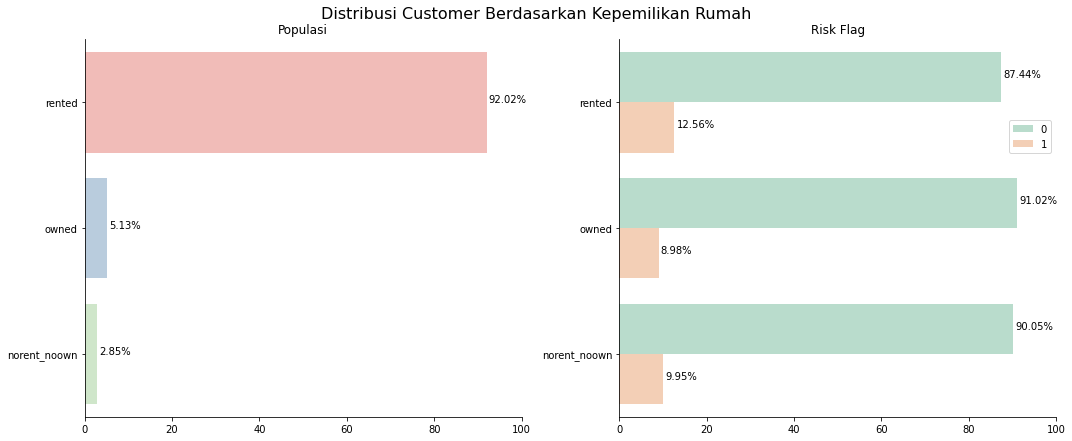

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Kepemilikan Rumah', fontsize=16, verticalalignment='bottom')

# Plot 1 (Populasi)
df_2a = df.groupby(['House_Ownership'])[['Id']].count().reset_index()
df_2a.loc[:,'percentage'] = 100.00*df_2a['Id']/df_2a['Id'].sum()
df_2a = df_2a.sort_values(['House_Ownership'],ascending=False)
ax1 = sns.barplot(x='percentage', y='House_Ownership',ax=ax1, data=df_2a.reset_index(), palette='Pastel1')
y = df_2a.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
df_2b = df.groupby(['House_Ownership','Risk_Flag'])['Id'].count().reset_index()
def ratio_rumah(x): # Menghitung ratio pernikahan
    if x['House_Ownership'] == 'owned':
        ratio_rumah = round(x['Id']*100/df_2b[df_2b['House_Ownership']=='owned']['Id'].sum(), 2)
    elif x['House_Ownership'] == 'rented':
        ratio_rumah = round(x['Id']*100/df_2b[df_2b['House_Ownership']=='rented']['Id'].sum(), 2)
    else:
        ratio_rumah = round(x['Id']*100/df_2b[df_2b['House_Ownership']=='norent_noown']['Id'].sum(), 2)
    return ratio_rumah
df_2b['percentage'] = df_2b.apply(lambda x: ratio_rumah(x), axis=1)
df_2b = df_2b.sort_values(['House_Ownership'],ascending=False)

ax2 = sns.barplot(x='percentage', y='House_Ownership',hue='Risk_Flag', ax=ax2, data=df_2b.reset_index(), palette='Pastel2')
ax2.text(87.44+0.5, -.2, '{:,.2f}%'.format(87.44))
ax2.text(12.56+0.5, .2, '{:,.2f}%'.format(12.56))
ax2.text(91.02+0.5, .8, '{:,.2f}%'.format(91.02))
ax2.text(8.98+0.5, 1.2, '{:,.2f}%'.format(8.98))
ax2.text(90.05+0.5, 1.8, '{:,.2f}%'.format(90.05))
ax2.text(9.95+0.5, 2.2, '{:,.2f}%'.format(9.95))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.8))

plt.tight_layout()

Pengamatan:

- Cutomer yang mempunyai rumah memiliki persentase yang sedikit (5.13%). **Customer tersebut pun mempunyai persentase keberhasilan untuk membayar pinjaman paling tinggi (91.02%)**.

#### Car ownership

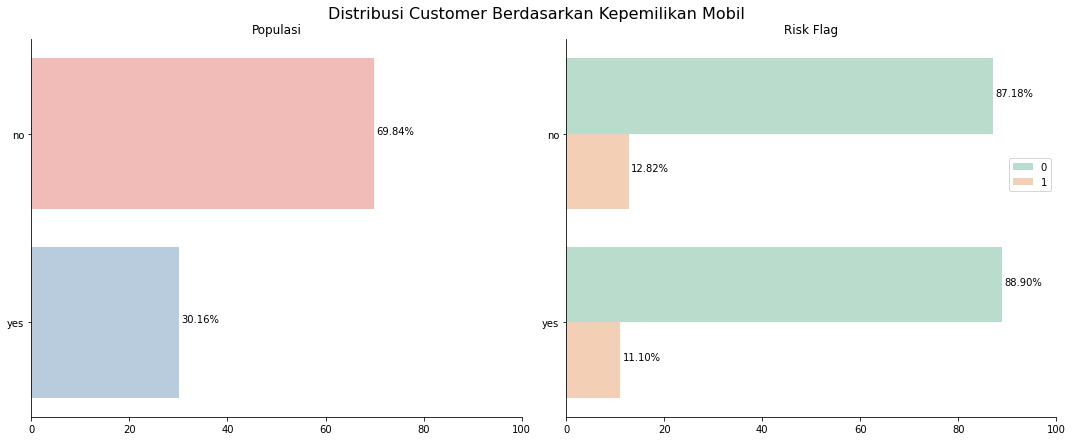

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Kepemilikan Mobil', fontsize=16, verticalalignment='bottom')

# Plot 1 (Populasi)
df_3a = df.groupby(['Car_Ownership'])[['Id']].count().reset_index()
df_3a.loc[:,'percentage'] = 100.00*df_3a['Id']/df_3a['Id'].sum()
df_3a = df_3a.sort_values(['Car_Ownership'])
ax1 = sns.barplot(x='percentage', y='Car_Ownership',ax=ax1, data=df_3a.reset_index(), palette='Pastel1')
y = df_3a.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
df_3b = df.groupby(['Car_Ownership','Risk_Flag'])['Id'].count().reset_index()
def ratio_mobil(x): # Menghitung ratio pernikahan
    if x['Car_Ownership'] == 'yes':
        ratio_mobil = round(x['Id']*100/df_3b[df_3b['Car_Ownership']=='yes']['Id'].sum(), 2)
    else:
        ratio_mobil = round(x['Id']*100/df_3b[df_3b['Car_Ownership']=='no']['Id'].sum(), 2)
    return ratio_mobil
df_3b['percentage'] = df_3b.apply(lambda x: ratio_mobil(x), axis=1)
df_3b = df_3b.sort_values(['Car_Ownership'])

ax2 = sns.barplot(x='percentage', y='Car_Ownership', hue='Risk_Flag', ax=ax2, data=df_3b.reset_index(), palette='Pastel2')
ax2.text(87.18+0.5, -.2, '{:,.2f}%'.format(87.18))
ax2.text(12.82+0.5, .2, '{:,.2f}%'.format(12.82))
ax2.text(88.90+0.5, .8, '{:,.2f}%'.format(88.90))
ax2.text(11.10+0.5, 1.2, '{:,.2f}%'.format(11.10))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.7))

plt.tight_layout()

Pengamatan:

- Customer yang tidak mempunyai mobil memiliki persentase populasi lebih banyak (69.85%) dibandingkan customer yang mempunyai mobil (30.16%). 87.18% customer yang tidak mempunyai mobil dapat mengembalikan pinjaman dan 88.90% customer yang mempunyai mobil dapat mengembalikan pinjaman. **Perbedaan populasi yang cukup besar ini tidak diikuti dengan perbedaan gagal bayar yang besar juga**.

Berdasarkan [2]:

- Memiliki kendaraan mengeluarkan biaya tambahan untuk kendaraan tersebut.

[2] https://www.moneyunder30.com/true-cost-of-owning-a-car

#### Age

In [ ]:
# Import copy data
df_4 = df.copy()

# Membuat fungsi untuk membagi segment umur
def segment_umur(x):
    if x['Age'] <= 39:
        segment = '21-39'
    elif x['Age'] >= 40 and x['Age'] <= 59:
        segment = '40-59'
    else:
        segment = '>59'
    return segment

df_4['Age'] = df_4.apply(lambda x: segment_umur(x), axis=1)

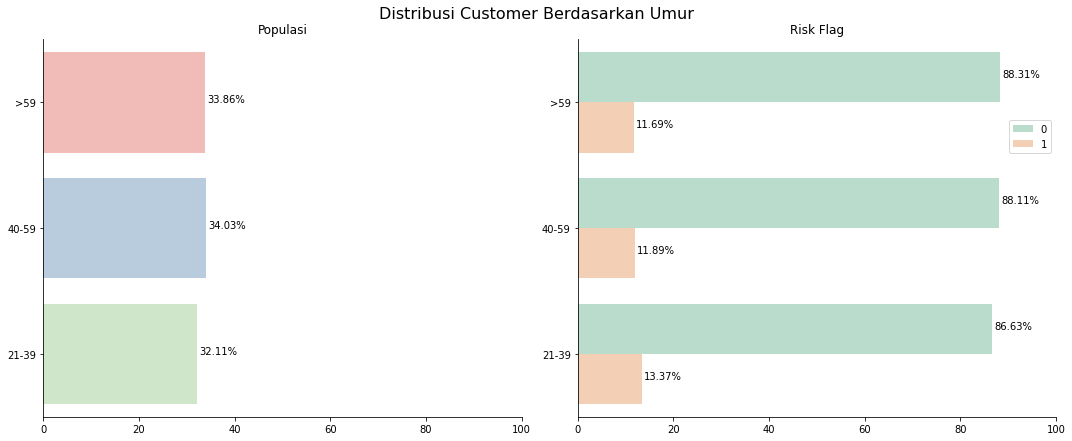

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Umur', fontsize=16, verticalalignment='bottom')

# Plot 1 (Populasi)
df_4a = df_4.groupby(['Age'])[['Id']].count().reset_index()
df_4a.loc[:,'percentage'] = 100.00*df_4a['Id']/df_4a['Id'].sum()
df_4a = df_4a.sort_values(['Age'],ascending=False)
ax1 = sns.barplot(x='percentage', y='Age',ax=ax1, data=df_4a.reset_index(), palette='Pastel1')
y = df_4a.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
df_4b = df_4.groupby(['Age','Risk_Flag'])['Id'].count().reset_index()
def ratio_umur(x):
    if x['Age'] == '21-39':
        ratio_umur = round(x['Id']*100/df_4b[df_4b['Age']=='21-39']['Id'].sum(), 2)
    elif x['Age'] == '40-59':
        ratio_umur = round(x['Id']*100/df_4b[df_4b['Age']=='40-59']['Id'].sum(), 2)
    else:
        ratio_umur = round(x['Id']*100/df_4b[df_4b['Age']=='>59']['Id'].sum(), 2)
    return ratio_umur
df_4b['percentage'] = df_4b.apply(lambda x: ratio_umur(x), axis=1)
df_4b = df_4b.sort_values(['Age'],ascending=False)

ax2 = sns.barplot(x='percentage', y='Age', hue='Risk_Flag', ax=ax2, data=df_4b.reset_index(), palette='Pastel2')
ax2.text(88.31+0.5, -.2, '{:,.2f}%'.format(88.31))
ax2.text(11.69+0.5, .2, '{:,.2f}%'.format(11.69))
ax2.text(88.11+0.5, .8, '{:,.2f}%'.format(88.11))
ax2.text(11.89+0.5, 1.2, '{:,.2f}%'.format(11.89))
ax2.text(86.63+0.5, 1.8, '{:,.2f}%'.format(86.63))
ax2.text(13.37+0.5, 2.2, '{:,.2f}%'.format(13.37))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.8))

plt.tight_layout()

Pengamatan:

- Perbedaan persentase berdasarkan populasi segment umur customer tidak memiliki perbedaan yang besar (signifikan). Walaupun demikian, **customer lebih muda (umur 21-39) memiliki persentase populasi yang paling rendah (32.11%)**. 

- Rendahnya populasi customer lebih muda tidak diikuti rendahnya persentase gagal bayar. **Customer lebih muda memiliki persentase gagal bayar paling tinggi (13.37%)** diantara yang lainnya.

- **Customer lebih tua (>59) memiliki persentase gagal bayar paling rendah (11.69%)**

Berdasarkan [3]:

- Pemohon yang sangat muda mungkin tidak memiliki penghasilan yang baik karena dia mungkin baru dalam pekerjaan. Walaupun demikian, pelamar yang lebih muda dianggap memiliki lebih banyak pekerjaan dan peluang penghasilan dibandingkan pelamar yang lebih tua. Oleh karena itu, Pemohon muda mendapat lebih banyak waktu untuk melakukan pembayaran kembali pinjaman mereka sedangkan pemohon yang lebih tua akan mendapatkan lebih sedikit waktu untuk melakukan pembayaran kembali keuangan.

- Biasanya, lebih baik untuk menggunakan pinjaman jangka panjang ketika Anda berusia pertengahan hingga akhir dua puluhan atau awal tiga puluhan karena ini adalah waktu ketika Anda bekerja dengan baik dan mampu membayar pembayaran bulanan dari penghasilan bulanan Anda.

- Seorang peminjam berusia 20-an atau 30-an memiliki cukup waktu untuk menghasilkan lebih banyak pendapatan dan kesempatan dibandingkan dengan orang yang berusia 50-an. Selain itu, pemberi pinjaman cenderung percaya bahwa penghasilan pemohon yang lebih muda akan terus meningkat di tahun-tahun mendatang sehingga pemberi pinjaman siap untuk memberikan perpanjangan masa kerja keuangan kepada pemohon yang lebih muda.

- Juga, jumlah pinjaman pemohon yang lebih muda umumnya tidak tinggi. Yang mengatakan, mereka mungkin ingin meminjam uang untuk mendanai perjalanan ke luar negeri, membayar uang muka kendaraannya, membawanya untuk keadaan darurat medis atau untuk membeli sesuatu yang mahal.

[3] https://gulfnews.com/your-money/saving-investment/best-age-to-apply-for-a-loan-can-i-be-denied-a-loan-because-of-my-age-1.1640584150272

#### Experience

In [ ]:
# Import copy data
df_5 = df.copy()

# Membuat fungsi untuk membagi segment experience
def segment_experience(x):
    if x['Experience'] < 7:
        segment = '0-6'
    elif x['Experience'] >= 7 and x['Experience'] <= 13:
        segment = '7-13'
    else:
        segment = '>13'
    return segment

df_5['Experience'] = df_5.apply(lambda x: segment_experience(x), axis=1)

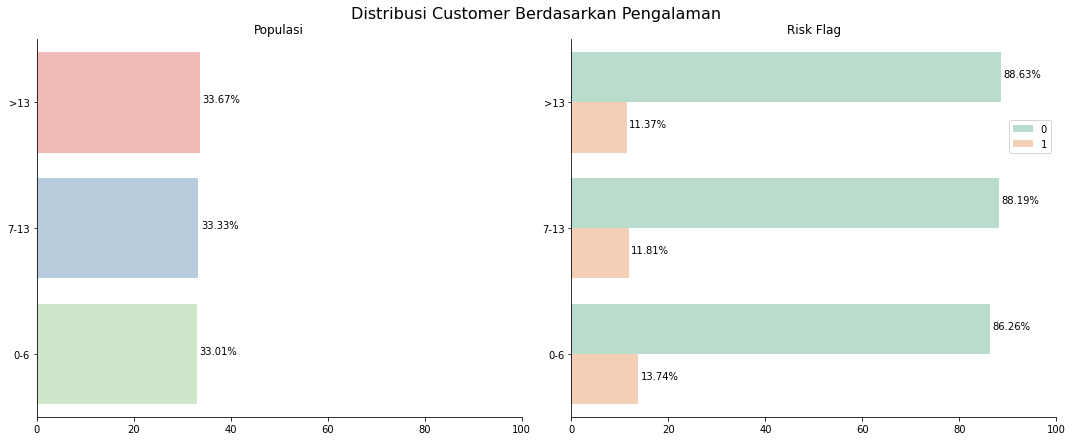

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), sharex=True)
fig.suptitle('Distribusi Customer Berdasarkan Pengalaman', fontsize=16, verticalalignment='bottom')

# Plot 1 (Populasi)
df_5a = df_5.groupby(['Experience'])[['Id']].count().reset_index()
df_5a.loc[:,'percentage'] = 100.00*df_5a['Id']/df_5a['Id'].sum()
df_5a = df_5a.sort_values(['Experience'],ascending=False)
ax1 = sns.barplot(x='percentage', y='Experience',ax=ax1, data=df_5a.reset_index(), palette='Pastel1')
y = df_5a.reset_index()['percentage']
for i, v in enumerate(y):
    ax1.text(v+0.5, i, '{:,.2f}%'.format(v))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, 100)
ax1.set_title('Populasi')

#Plot 2 (Risk Flag)
df_5b = df_5.groupby(['Experience','Risk_Flag'])['Id'].count().reset_index()
def ratio_experience(x):
    if x['Experience'] == '0-6':
        ratio_experience = round(x['Id']*100/df_5b[df_5b['Experience']=='0-6']['Id'].sum(), 2)
    elif x['Experience'] == '7-13':
        ratio_experience = round(x['Id']*100/df_5b[df_5b['Experience']=='7-13']['Id'].sum(), 2)
    else:
        ratio_experience = round(x['Id']*100/df_5b[df_5b['Experience']=='>13']['Id'].sum(), 2)
    return ratio_experience
df_5b['percentage'] = df_5b.apply(lambda x: ratio_experience(x), axis=1)
df_5b = df_5b.sort_values(['Experience'],ascending=False)

ax2 = sns.barplot(x='percentage', y='Experience', hue='Risk_Flag', ax=ax2, data=df_5b.reset_index(), palette='Pastel2')
ax2.text(88.63+0.5, -.2, '{:,.2f}%'.format(88.63))
ax2.text(11.37+0.5, .2, '{:,.2f}%'.format(11.37))
ax2.text(88.19+0.5, .8, '{:,.2f}%'.format(88.19))
ax2.text(11.81+0.5, 1.2, '{:,.2f}%'.format(11.81))
ax2.text(86.26+0.5, 1.8, '{:,.2f}%'.format(86.26))
ax2.text(13.74+0.5, 2.2, '{:,.2f}%'.format(13.74))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Risk Flag')
ax2.legend(bbox_to_anchor=(1, 0.8))

plt.tight_layout()

Pengamatan:

- Customer yang mempunyai pengalaman minim (0-6 tahun) mempunyai persentase kegagalan dalam membayar pinjaman yang besar dan populasi yang lebih sedikit.

### **b. Rekomendasi**

1. Persentase gagal bayar di state/ negara bagian yang memiliki customer yang sedikit cenderung lebih rendah, seperti Sikkim (4.61%), dibandingkan dengan state yang memiliki customer yang cenderung lebih banyak seperti Uttar Pradesh (11,77%). Maka **akan lebih baik untuk dibuat suatu marketing khusus di lokasi yang memiliki rate gagal bayar yang rendah atau di lokasi yang masih memiliki sedikit customer**. 

2. Customer dengan status pernikahan married/menikah memiliki persentase populasi yang rendah (10.21%) dengan persentase resiko gagal bayar yang rendah juga (10.25%) dibandingkan customer berstatus single/lajang. **Maka, perlu melakukan target marketing kepada customer berstatus menikah untuk mendorong mereka mengajukan pinjaman** dengan memberikan informasi seperti kemudahan memiliki aset (rumah, kendaraan, bisnis, dll) melalui pinjaman untuk menunjang kebutuhan rumah tangga. Karena, customer berstatus menikah cenderung memiliki keuangan yang lebih stabil.

3. Cutomer yang mempunyai rumah memiliki populasi yang sedikit (5.13%). Mempunyai rumah merupakan keputusan finansial besar karena memerlukan pengeluaran tambahan, namun persentae keberhasilan membayar pinjaman customer yang mempunyai rumah memiliki nilai paling tinggi (91.02%). Dapat dikatakan bahwa customer yang memiliki rumah mempunyai finansial yang lebih stabil dan manajemen keuangan yang baik. Oleh karena itu, harus **meningkatkan jumlah customer yang mempunyai rumah dengan memberikan pinjaman yang berkaitan dengan rumah seperti pinjaman renovasi**.

4. Customer yang tidak mempunyai kendaraan (69.85%) lebih banyak dari pada customer yang mempunyai kendaraan (30.16%). Walaupun selisih populasinya cukup besar, namun persentase keberhasilan pembayaran pinjaman antara kedua kategori customer tersebut tidak memiliki perbedaan yang besar, selisih 1.72% dengan customer yang tidak mempunyai kendaraan memiliki persentase keberhasilan lebih kecil. Maka, perlu melakukan tindakan untuk **meningkatkan keberhasilan customer yang tidak mempunyai kendaraan untuk membayar suatu pinjaman**. Dapat **memberikan penawaran kepada customer yang tidak mempunyai kendaraan untuk dapat mempunyai kendaraan secara mudah dan tidak memberatkan melalui pinjaman dengan jaminan kendaraan tersebut ditambah dengan suku bunga yang rendah dan tenor yang panjang**.

5. Persentase gagal bayar customer muda (umur 21-39) memiliki nilai yang paling tinggi (13.37%) dibandingkan customer yang berumur >39. Untuk menurukan angka tersebut, dapat **memberikan service yang menarik seperti pinjaman jangka panjang dengan proses pengajuan yang mudah kepada customer muda**. Karena, customer muda cenderung menyukai hal yang simpel, lebih memiliki banyak waktu untuk menghasilkan lebih banyak pendapatan dan kesempatan sehingga dapat melakukan pembayaran kembali pinjaman dari penghasilan bulanan mereka.

6. Persentase gagal bayar customer yang mempunyai pengalaman minim (0-6 tahun) memiliki nilai yang paling tinggi (13.74%) dengan populasi yang sedikit. **Perlu melakukan perubahan sistem pinjaman kepada customer yang memiliki pengalaman minim sehingga tidak membebani customer**.